# CSE 574 - Assignment 2

#### Glenn Thomakos

I certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that I did not receive
any external help, coaching or contributions during the production of this work.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Data Analysis - Penguin dataset

In [2]:
df_penguins = pd.read_csv('datasets/penguins.csv')

When I get a dataset I haven't seen before there's some fundamental questions that need to be answered. Namely, "how big is it?" and "what does it contain?" These two calls to shape and columns represent the answers to these questions. 

We can see from the shape call that there are 344 entries along with 8 features. So a fairly small database. But what exactly are these 8 columns?

The call to columns yields results that are easily interpretable using common knowledge about penguins. From here we begin to understand what exactly is in the dataset, even though we don't yet know what to expect numerically or categorically from each feature.

In [3]:
print(df_penguins.shape)
print(df_penguins.columns)

(344, 8)
Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


Here we have the dtypes call which tells us what sort of information to expect. We know that species, island, and sex are categorical while the others are numerical. Intuitively this is something we'd expect, but it's not always the case. For instance, it wouldn't be outside the realm of possibilities to have a number designating what species a penguin is. That would make it an int64 attribute like year instead of an object attribute.

In [4]:
df_penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

With describe() we get a better sense as to what the numerical attributes look like. My knowledge of penguins only extends to the fact that they have bills and flippers, it doesn't extend to how long or how deep they are. So this sort of thing is always helpful. It can also be nice to find outliers in the min and max rows.

In [5]:
df_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Finally we arrive at a quick glimpse of what a few entries in the dataset look like. This particular call to head also tells us that there are null values in the dataset that will eventually need to be handled.

In [6]:
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Now we see where the null values are coming from. Thankfully they're a fairly small amount with 11 being the largest amount in a column. I feel very comfortable simply dropping these values off given the small effect it's likely to have on the overall database. The upper bound of entries with a null feature is 19, and we know already that isn't even reached from the head() call one cell above. That means less than 6% of the data has a missing entry.

In [7]:
df_penguins.isnull().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [8]:
df_penguins = df_penguins.dropna()

In [9]:
df_penguins['species'] = df_penguins['species'].astype('category')
df_penguins['island'] = df_penguins['island'].astype('category')
df_penguins['sex'] = df_penguins['sex'].astype('category')

Plotting visualizations can give you a better look at how data aggregates as well. For instance, this 'Mass vs Flipper Length' plot clearly indicates a linear correlation between mass and flipper length.

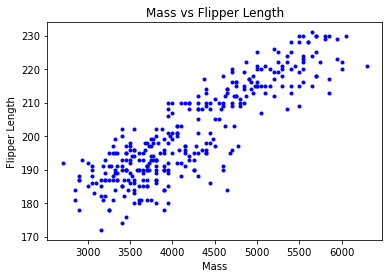

In [10]:
plt.plot(df_penguins['body_mass_g'],df_penguins['flipper_length_mm'],'b.')
plt.title('Mass vs Flipper Length')
plt.xlabel('Mass')
plt.ylabel('Flipper Length')
plt.show()

These overlayed density plots indicate separation between the three species in terms of flipper length. More specifically, Gentoo penguins can be easily distinguished from the other two species solely based off of flipper length.

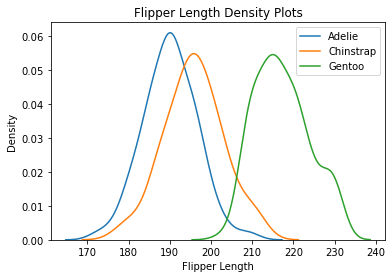

In [11]:
sns.kdeplot(df_penguins[df_penguins['species']=='Adelie']['flipper_length_mm'])
sns.kdeplot(df_penguins[df_penguins['species']=='Chinstrap']['flipper_length_mm'])
sns.kdeplot(df_penguins[df_penguins['species']=='Gentoo']['flipper_length_mm'])
plt.legend(labels=['Adelie','Chinstrap','Gentoo'])
plt.title('Flipper Length Density Plots')
plt.xlabel('Flipper Length')
plt.show()

A different way of seeing the same splits as above is to use a bar chart. From here, we can see that the Adelie penguins have significantly smaller bills than the other two species. However, the above plot is preferred given that it shows the distribution of the data. Especially if the following goal is classification, it's nice to know how separated they are.

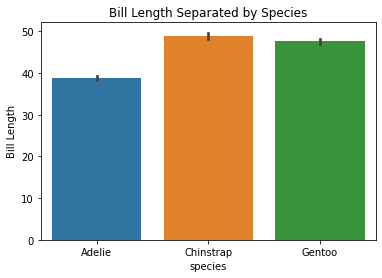

In [12]:
sns.barplot(x=df_penguins['species'],y=df_penguins['bill_length_mm'])
plt.title('Bill Length Separated by Species')
plt.ylabel('Bill Length')
plt.show()

Every once in a while, something you think might be true turns out not to be supported by the actual data. For instance, I thought it was pretty reasonable to think that longer bill means deeper bill because longer bill must mean overall larger bill right? Well, it turns out that there's very minimal correlation in these penguin species between bill length and bill depth.

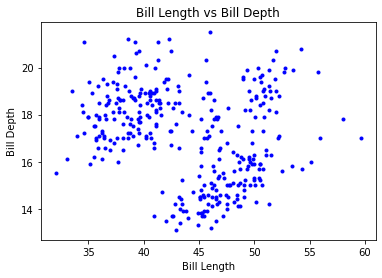

In [13]:
plt.plot(df_penguins['bill_length_mm'],df_penguins['bill_depth_mm'],'b.')
plt.title('Bill Length vs Bill Depth')
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.show()

This final graph is the same one as above, but with different colors for each species of penguin. I saw a little bit of separation in the plot above and wondered if it was due to the different species and, sure enough, it was. There's some clear delineation between the species based on their bill size. This also suggests that a new feature of "bill size" may be helpful if classifying the different species.

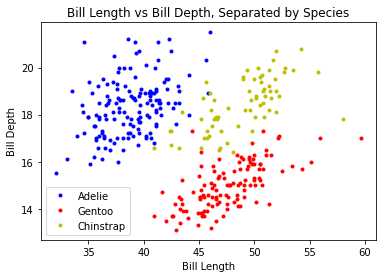

In [14]:
df_adelie = df_penguins[df_penguins['species']=='Adelie']
df_gentoo = df_penguins[df_penguins['species']=='Gentoo']
df_chinstrap = df_penguins[df_penguins['species']=='Chinstrap']

plt.plot(df_adelie['bill_length_mm'],df_adelie['bill_depth_mm'],'b.')
plt.plot(df_gentoo['bill_length_mm'],df_gentoo['bill_depth_mm'],'r.')
plt.plot(df_chinstrap['bill_length_mm'],df_chinstrap['bill_depth_mm'],'y.')

plt.title('Bill Length vs Bill Depth, Separated by Species')
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.legend(labels=['Adelie','Gentoo','Chinstrap'])
plt.show()

## Part 1: Data Analysis - Insurance dataset

In [15]:
df_insurance = pd.read_csv('datasets/insurance.csv')

The insurance dataset is about 3 times larger than the penguins dataset, but with one less column. All of the columns except for 'charges' seem fairly intuitive to me.

In [16]:
print(df_insurance.shape)
print(df_insurance.columns)

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


From standard domain knowledge, these data types are about what we'd expect when it comes to these variables. No surprises.

In [17]:
df_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

I was really hoping to find some more information on charges but there's really nothing here. It is helpful to know what the ranges of the other columns are.

In [18]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Now we see what the dataset looks like. No big surprises here to speak of.

In [19]:
# It's at this point that I just gave up and googled what charges was.
# Individual medical costs incurred by each person.
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Isn't it lovely to see? No missing values.

In [20]:
df_insurance.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
df_insurance['sex'] = df_insurance['sex'].astype('category')
df_insurance['smoker'] = df_insurance['smoker'].astype('category')
df_insurance['region'] = df_insurance['region'].astype('category')

I made this chart since I expected to see some correlation between age and charges which just seems normal right? The longer you're alive the more medical cost you rack up. But something more interesting has shown up: the stratification of cost. I'm not entirely sure why this is the case. But charges seem to be settled around 3 distinct regions.

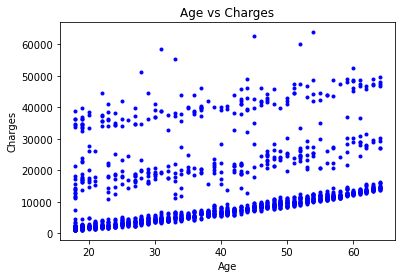

In [22]:
plt.plot(df_insurance['age'],df_insurance['charges'],'b.')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

There isn't much distinction between male and female in terms of BMI.

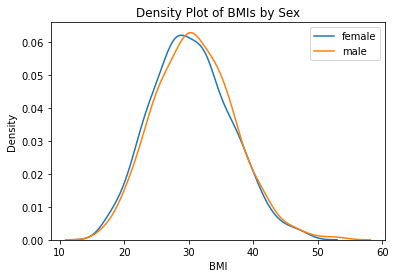

In [23]:
sns.kdeplot(df_insurance[df_insurance['sex']=='female']['bmi'])
sns.kdeplot(df_insurance[df_insurance['sex']=='male']['bmi'])
plt.title('Density Plot of BMIs by Sex')
plt.xlabel('BMI')
plt.legend(labels=['female','male'])
plt.show()

We can see that the most common amount of children is 0, decreasing with each added child considered.

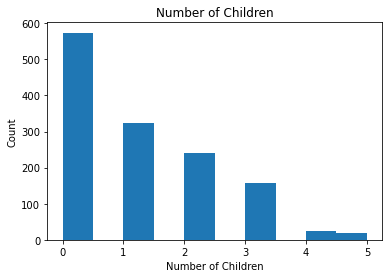

In [24]:
plt.hist(df_insurance['children'])
plt.title('Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

Sometimes a graph may not be the best way to look at things. We can see that in this dataset, there are more male smokers than there are female smokers. Albeit the margin is fairly small.

In [25]:
pd.pivot_table(df_insurance,index='smoker',columns='sex',values='age',aggfunc='count')

sex,female,male
smoker,,
no,547,517
yes,115,159


Here we see an incredibly vague linear pattern between an entry's BMI and their charges incurred. Notably, there's also a similar stratification as to the first graph as there appear to be two relatively distinct "classes" in charges, where a line of y=~30,000 would make for a fairly clean cut.

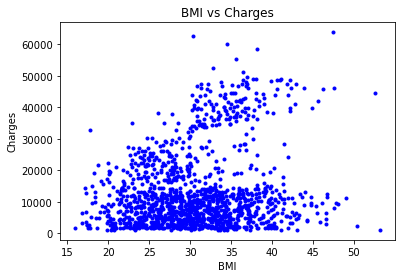

In [26]:
plt.plot(df_insurance['bmi'],df_insurance['charges'],'b.')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

## Part 1: Data Analysis - Wine dataset

In [27]:
df_wine = pd.read_csv('datasets/winequality-red.csv')

Yet again we have a larger dataset than the penguins one. This time with even more columns. Most of them mean nothing to me but I'd say that's alright since I doubt they mean anything to anyone other than a sommelier. Even if I do wind up realizing that a low fixed acidity increases quality, I can't exactly go into a liquor store and ask the guy if he's got any wines with low fixed acidity.

In [28]:
print(df_wine.shape)
print(df_wine.columns)

(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


All numerical. That's pretty nice. It means no needing to convert anything to a categorical variable.

In [29]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [30]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This is a bit of a dense, overly numeric dataset. It's hard to look at this dataframe and think that these are products on a shelf in a store. However, it should lend itself well to regression analyses.

In [31]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Yet again there's no missing values. So nothing needs to be done here.

In [32]:
df_wine.isnull().sum(axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Not too much to glean from this graph except that there's not much of a correlation between pH and alcohol content.

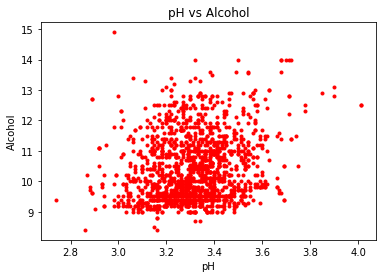

In [33]:
# Switching up the colors since red is a much more "wine" color to me.
plt.plot(df_wine['pH'],df_wine['alcohol'],'r.')
plt.title('pH vs Alcohol')
plt.xlabel('pH')
plt.ylabel('Alcohol')
plt.show()

In an attempt to find some domain knowledge on what causes sulphates, maybe sulfur dioxide does? Well, apparently not. However, I did stumble on some outliers in the total sulfur dioxide column. Those two isolated points in the bottom right of the graph are so far removed from everything else it would probably be wise to just remove them. But that's outside the scope of this assignment so they'll be left in there.

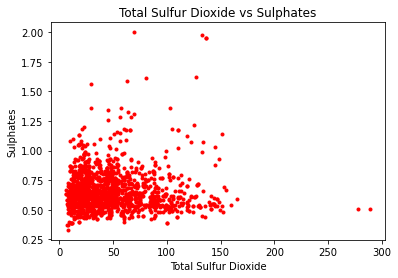

In [34]:
plt.plot(df_wine['total sulfur dioxide'],df_wine['sulphates'],'r.')
plt.title('Total Sulfur Dioxide vs Sulphates')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Sulphates')
plt.show()

After taking a couple random shots in the dark on where there may be some correlation, it's better to just do everything all at once. The graph below shows areas of high correlation which may be helpful to look into.

The main diagonal is trivially correlated as well as "free sulfur dioxide" and "total sulfur dioxide", but a couple areas of interest that will be the subject of the next plots are "fixed acidity" and "pH" as well as "quality" and "alcohol."

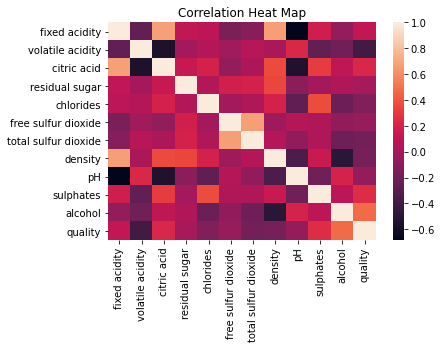

In [35]:
sns.heatmap(df_wine.corr())
plt.title('Correlation Heat Map')
plt.show()

This plot is interesting to me since while there is some linear correlation as suggested in the correlation plot above, there's a very obvious curve to the data which suggests the linear correlation would be improved greatly with some alteration of either of the columns.

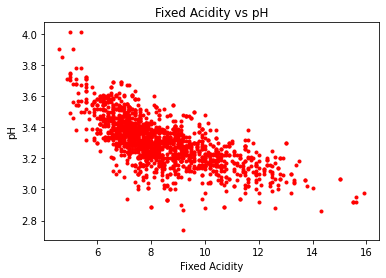

In [36]:
plt.plot(df_wine['fixed acidity'],df_wine['pH'],'r.')
plt.title('Fixed Acidity vs pH')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.show()

Even though the scatter plot format of this data is forced and probably not the best idea, a linear pattern is still apparent and it's definitely not unreasonable to say that there's a linear correlation between alcohol and quality.

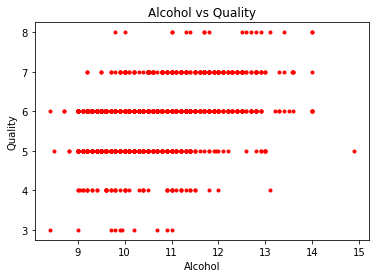

In [37]:
plt.plot(df_wine['alcohol'],df_wine['quality'],'r.')
plt.title('Alcohol vs Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

## Part 2: Logistic Regression

Penguins was the first dataset used above, and the imports are all kept in the very first code cell so steps 1, 2, and 3 are already finished.

In [38]:
# Normalizing bill length
min_bill_length = min(df_penguins['bill_length_mm'])
max_bill_length = max(df_penguins['bill_length_mm'])
df_penguins['bill_length_mm'] = (df_penguins['bill_length_mm']-min_bill_length)/(max_bill_length-min_bill_length)

# Normalizing bill depth
min_bill_depth = min(df_penguins['bill_depth_mm'])
max_bill_depth = max(df_penguins['bill_depth_mm'])
df_penguins['bill_depth_mm'] = (df_penguins['bill_depth_mm']-min_bill_depth)/(max_bill_depth-min_bill_depth)

# Normalizing flipper length
min_flipper = min(df_penguins['flipper_length_mm'])
max_flipper = max(df_penguins['flipper_length_mm'])
df_penguins['flipper_length_mm'] = (df_penguins['flipper_length_mm']-min_flipper)/(max_flipper-min_flipper)

# Normalizing body mass
min_mass = min(df_penguins['body_mass_g'])
max_mass = max(df_penguins['body_mass_g'])
df_penguins['body_mass_g'] = (df_penguins['body_mass_g']-min_mass)/(max_mass-min_mass)

For this assignment, our target variable will be identifying the penguins as "gentoo" or "not gentoo". This will require some modification of the species column.

Furthermore, when we get down to the equation part of things we're going to run into issues with the categorical values, so I'm just going to eliminate them from consideration. This could be fixed by one-hot encoding the categoricals but the classifier should work fine without them. We're also going to drop the year because, even though it's numeric, it's just a categorical variable masquerading as numeric.

In [39]:
df_penguins['species'] = df_penguins['species'].replace('Gentoo',1)
df_penguins['species'] = df_penguins['species'].replace('Adelie',0)
df_penguins['species'] = df_penguins['species'].replace('Chinstrap',0)
df_penguins['species'] = df_penguins['species'].astype('int')

columns_to_drop = ['island','sex','year']
df_penguins = df_penguins.loc[:,~df_penguins.columns.isin(columns_to_drop)]

Creating data frames for input (X) and target (Y). Also, the data appears to be ordered based on species so we're going to shuffle the data now so that once the train-test split comes we only have to shuffle one thing.

In [40]:
df_penguins = df_penguins.sample(frac=1).reset_index(drop=True)
X = df_penguins.loc[:,df_penguins.columns!='species']
y = df_penguins['species']

80/20 train/test split

In [41]:
x_train_index = np.floor(0.8*df_penguins.shape[0])
X_train = X.loc[0:x_train_index]
X_test = X.loc[x_train_index+1:df_penguins.shape[0]]

y_train_index = np.floor(0.8*df_penguins.shape[0])
y_train = y.loc[0:y_train_index]
y_test = y.loc[y_train_index+1:y.shape[0]]

In [42]:
# A learning rate of 1e-6 was working WAY too slowly. This worked far better.

learning_rate = 0.01
iterations = 1000
weights = np.random.uniform(0,1,X_train.shape[1])
bias = 0

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def cost(X,y,weights,bias):
    h = sigmoid(np.dot(weights,X.T)+bias)
    J = -np.mean(y*np.log(h)-(1-y)*np.log(1-h))
    return J

def gradient_descent(X,y,weights,bias):
    pred = sigmoid(np.dot(weights,X.T)+bias)
    delta = pred-y
    dW = (1/(X.shape[0]))*np.dot(X.T,delta)
    dB = np.sum(delta/(X.shape[0]))
    return dW,dB

def fit(X,y,input_weights,input_bias):
    loss = []
    weights = input_weights
    bias = input_bias
    for i in range(iterations):
        dW,dB = gradient_descent(X,y,weights,bias)
        pred = np.around(sigmoid(np.dot(weights,X.T)+bias))
        loss_entry = np.mean(abs(pred-y))
        loss.append(loss_entry)
        weights = weights-(learning_rate*dW)
        bias = bias-(learning_rate*dB)
          
    return weights,bias,loss

In [43]:
updated_weights,updated_bias,updated_loss = fit(X_train,y_train,weights,bias)

In [44]:
y_hat_final = np.around(sigmoid(np.dot(updated_weights,X_test.T)+updated_bias))
1-np.mean(abs(y_hat_final-y_test))

0.9696969696969697

In [45]:
print(updated_weights)
updated_bias

[ 0.27845397 -0.94813119  0.94753227  1.12981292]


-1.0994613307351266

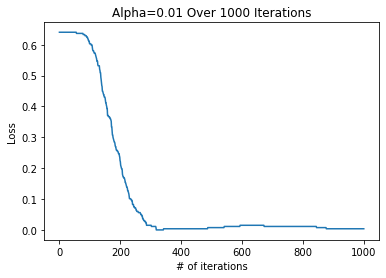

In [46]:
plt.plot(updated_loss)
plt.xlabel('# of iterations')
plt.ylabel('Loss')
plt.title('Alpha=0.01 Over 1000 Iterations')
plt.show()

In [47]:
learning_rate = 10

# In the interest of runtime, this was abbreviated
iterations = 10000

updated_weights,updated_bias,updated_loss = fit(X_train,y_train,weights,bias)

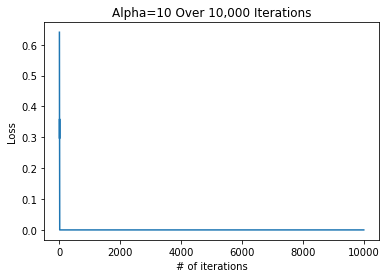

In [48]:
plt.plot(updated_loss)
plt.xlabel('# of iterations')
plt.ylabel('Loss')
plt.title('Alpha=10 Over 10,000 Iterations')
plt.show()

## Part 3: Linear Regression

For this section we're going to be using the wine dataset. As with the logistic regression section,the necessary libraries are already imported and the preprocessing is largely finished. Thankfully, there's no string variables to switch to categorical, but there's quite a few that need normalizing.

In [49]:
df_wine = (df_wine-df_wine.min())/(df_wine.max()-df_wine.min())

For this dataset and section, I've chosen alcohol as the target variable. The reason for this is that quality would be much better suited for multiclass classification and the other variables don't mean a whole lot for me, but alcohol I'm already familiar with making one of the large benefits of linear regression, its interpretability, far more pronounced.

In [50]:
X = df_wine.loc[:,df_wine.columns!='alcohol']
# Note that this will make the last entry in the weights vector the bias term
X['bias'] = np.ones(X.shape[0])
y = df_wine['alcohol']

In [51]:
x_train_index = np.floor(0.8*df_wine.shape[0])
X_train = X.loc[0:x_train_index]
X_test = X.loc[x_train_index+1:df_wine.shape[0]]

y_train_index = np.floor(0.8*df_wine.shape[0])
y_train = y.loc[0:y_train_index]
y_test = y.loc[y_train_index+1:y.shape[0]]

In [52]:
print('X_train shape is '+str(X_train.shape))
print('X_test shape is '+str(X_test.shape))
print('y_train shape is '+str(y_train.shape))
print('y_test shape is '+str(y_test.shape))

X_train shape is (1280, 12)
X_test shape is (319, 12)
y_train shape is (1280,)
y_test shape is (319,)


In [59]:
def ols_weights(X,y):
    weights = np.dot(np.dot(np.linalg.inv(np.dot((X.T),X)),X.T),y)
    return weights
weights = ols_weights(X_train,y_train)
# Recall that the last entry here is the bias term
print(weights)

[ 0.88828121  0.16569405  0.12366803  0.66794222 -0.01323321 -0.01204942
 -0.06855743 -1.21939472  0.70641751  0.20899804  0.1909163   0.01503135]


In [60]:
def ols_predict(X,model):
    return (model.T*X).sum(axis=1)
prediction = ols_predict(X_test,weights)

In [61]:
train_error = np.sum(np.square(y_train-prediction))/len(prediction)
print('Train error is: '+str(train_error))

Train error is: 0.0


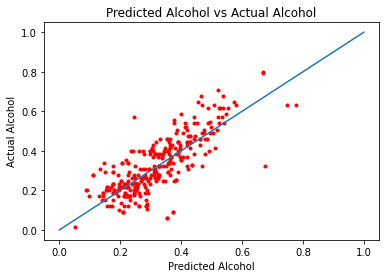

In [62]:
plt.plot(prediction,y_test,'r.')
plt.title('Predicted Alcohol vs Actual Alcohol')
plt.xlabel('Predicted Alcohol')
plt.ylabel('Actual Alcohol')
plt.plot([0,1])
plt.show()

## Part 4: Ridge Regression

For direct comparison, we're going to be using the same dataset, same target variable, and same train test splits as the standard OLS linear regression from the section above. It's worth mentioning that this could easily have been done as just one function but for the sake of compartmentalization I'm just going to rewrite the function down here with an extra lambda input parameter.

In [66]:
def ridge_weights(X,y,penalty):
    penalty_matrix = penalty*np.identity(X.shape[1])
    weights = np.dot(np.dot(np.linalg.inv(np.dot((X.T),X)+penalty_matrix),X.T),y)
    return weights

def ridge_predict(X,model):
    return (model.T*X).sum(axis=1)

prediction = ridge_predict(X_test,weights)
train_error = np.sum(np.square(y_train-prediction))/len(prediction)
print('Train error is: '+str(train_error))

Train error is: 0.0


In [67]:
weights = ridge_weights(X_train,y_train,-0.12)
print(weights)

[ 0.93626438  0.16654788  0.115086    0.6892817   0.00318469 -0.01716506
 -0.05783071 -1.25726781  0.73604143  0.21411377  0.18423548  0.00402324]


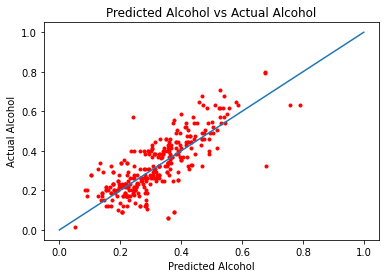

In [69]:
test_predictions = ridge_predict(X_test,weights)

plt.plot(test_predictions,y_test,'r.')
plt.title('Predicted Alcohol vs Actual Alcohol')
plt.xlabel('Predicted Alcohol')
plt.ylabel('Actual Alcohol')
plt.plot([0,1])
plt.show()